# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#question">Research Questions</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



<a id='wrangling'></a>
## Data Wrangling

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read data 
df = pd.read_csv('C:\\Users\\aalsulami\\tmdb-movies.csv')

In [3]:
# display the 1st two record
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
# display No of rows & columns
df.shape

(10866, 21)

In [5]:
# display all columns with their data types & count of non-value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

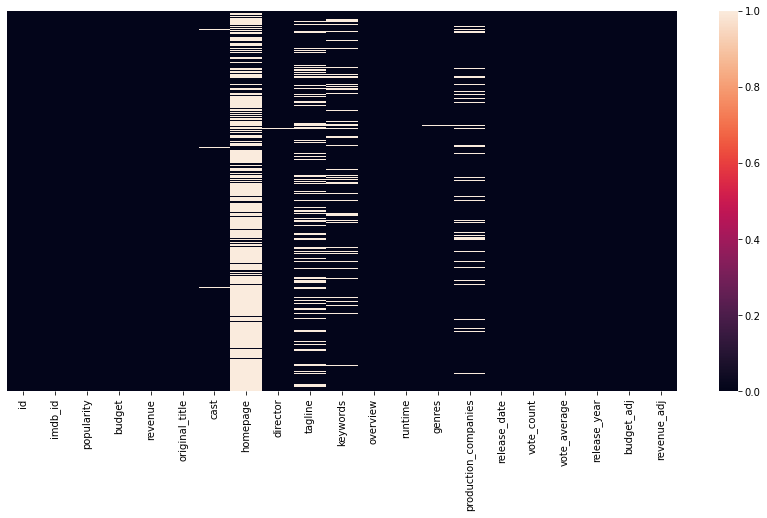

In [6]:
# visualize null values for each column
plt.figure(figsize=(15,7))
sns.heatmap(df.isna());
plt.yticks([]);

In [7]:
# calculate the number of null values for each column
round(df.isna().sum()/df.shape[0] *100)

id                       0.0
imdb_id                  0.0
popularity               0.0
budget                   0.0
revenue                  0.0
original_title           0.0
cast                     1.0
homepage                73.0
director                 0.0
tagline                 26.0
keywords                14.0
overview                 0.0
runtime                  0.0
genres                   0.0
production_companies     9.0
release_date             0.0
vote_count               0.0
vote_average             0.0
release_year             0.0
budget_adj               0.0
revenue_adj              0.0
dtype: float64

#### Take a look to budget and revenue values for all movies 

In [8]:
# display basic statistic for budget & revenue columns
# to see if there is mismatched values such as zero
df[['budget','revenue']].describe()

,budget,revenue
count,1.086600e+04,1.086600e+04
mean,1.462570e+07,3.982332e+07
std,3.091321e+07,1.170035e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.500000e+07,2.400000e+07
max,4.250000e+08,2.781506e+09


I think there some mistakes here in this data, we should drop these movies without budget and revenue.

## Data Cleaning

#### Drop all movies without budget and revenue

In [9]:
# drop all zero values in revenue & budget columns
df_with_budget_and_revenue = df[(df['revenue'] != 0.0) & (df['budget'] != 0.0)]

#### Check there are not any zero in budget or revenue.

In [10]:
# display basic statistic for budget & revenue columns
# to check if all zero values dropped
df_with_budget_and_revenue[['budget', 'revenue']].describe()

,budget,revenue
count,3.855000e+03,3.855000e+03
mean,3.720183e+07,1.076589e+08
std,4.220291e+07,1.765248e+08
min,1.000000e+00,2.000000e+00
25%,1.000000e+07,1.357645e+07
50%,2.400000e+07,4.479322e+07
75%,5.000000e+07,1.241530e+08
max,4.250000e+08,2.781506e+09


<a id='eda'></a>
## Exploratory Data Analysis

#### Movie Release Years Distribution

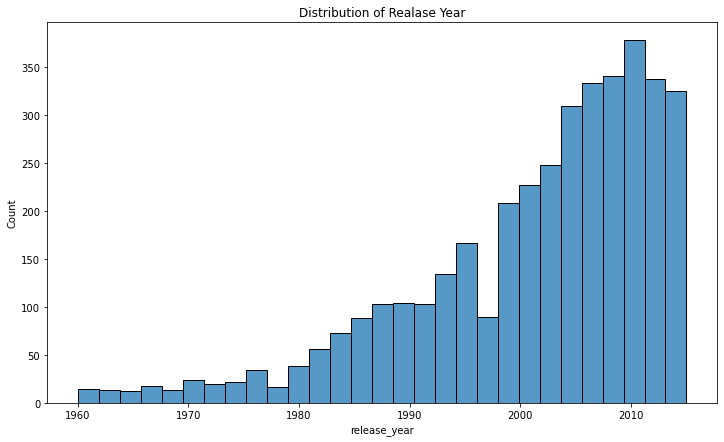

In [11]:
# plotting the distributing of release years of movie
plt.figure(figsize=(12,7))
sns.histplot(df_with_budget_and_revenue['release_year'])
plt.title('Distribution of Realase Year', fontsize=12);

In [12]:
round(df_with_budget_and_revenue[df_with_budget_and_revenue['release_year'] >=2000].shape[0] / df_with_budget_and_revenue.shape[0] * 100)

65

We can say, around 65 % from movie released from 2000 and there is increased as incremently in the count of movie within the last years.
There is a drop between 1996 and 1997 and also in the 2015 the count drop.

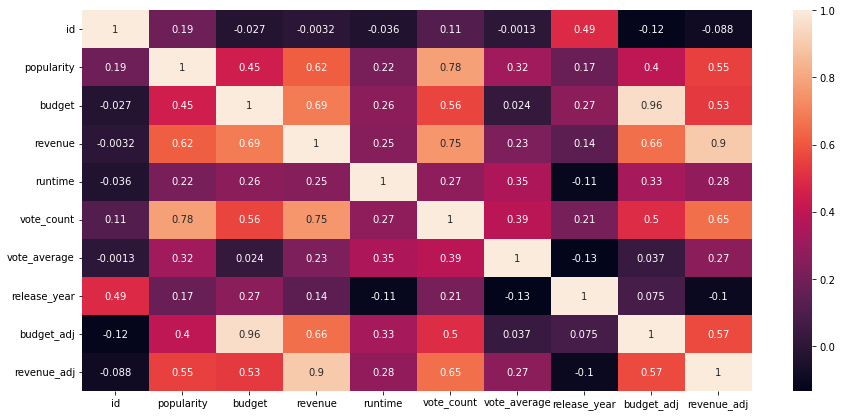

In [13]:
# visualize the correlation between all columns "varialbes"
df_corr = df_with_budget_and_revenue.corr()

plt.figure(figsize=(15,7))
sns.heatmap(df_corr, annot=True);

We can focus on the following variables according to thier correlation between them.
- Popularity
- Budget
- Revenue
- vote_count
- release_year

#### Popularity vs vote_count

In [14]:
def scatter_plot(df, chart_title, col1, col2, col3=None):
    """Plotting col1 and col2 in a sccater chart according to the distribution of col3"""
    
    plt.figure(figsize=(15,7))

    x = df[col1]
    y = df[col2]
    
    if col3:
            sns.scatterplot(y,x,data=df, hue=col3)
    else:
        sns.scatterplot(y,x)

    plt.title(chart_title, fontsize=12);

C:\Users\aalsulami\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


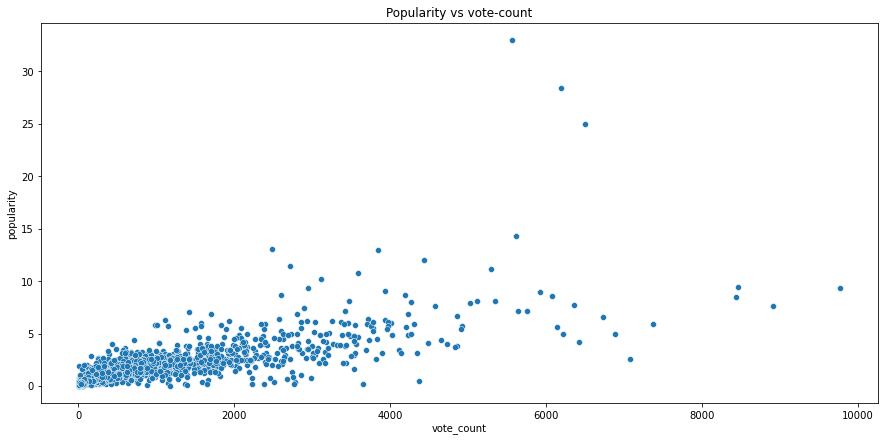

In [30]:
# visualize the popularity and vote_count in scatter chart
scatter_plot(df_with_budget_and_revenue, 'Popularity vs vote_count', 'popularity', 'vote_count')

We can say, there is a normal positive line correlation bewtween vote_count and popularity. As well as the direction of values into the vote_count side more than popularity side and this means every increase the vote_count a little bit increase in popularity.

#### Budget vs Revenue

C:\Users\aalsulami\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


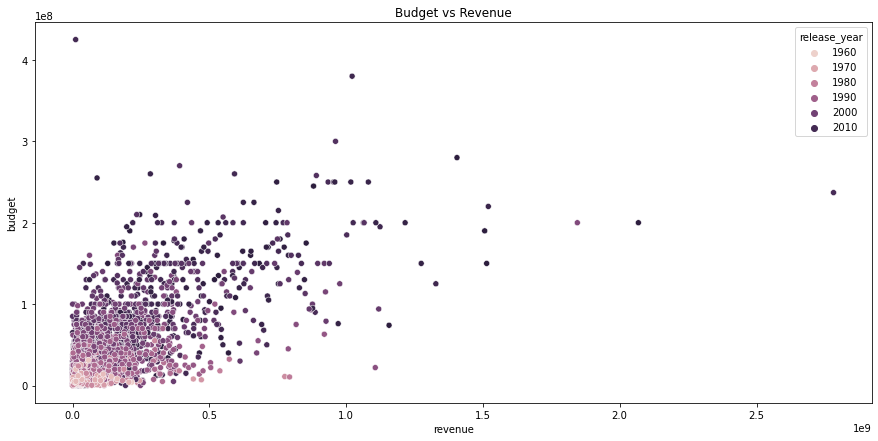

In [15]:
# visualize the budget and revenue as well as scale them according to the time in scatter chart
scatter_plot(df_with_budget_and_revenue, 'Budget vs Revenue', 'budget', 'revenue','release_year')

We can say, there is a positive line correlation bewtween budget and revenue. As well as the direction of values into the budget side more than revenue side and this means every an increase in the budget perform to a little bit increase in the revenue as well as the reveune and budget raise with the time.

#### Revenue vs Vote Count

C:\Users\aalsulami\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


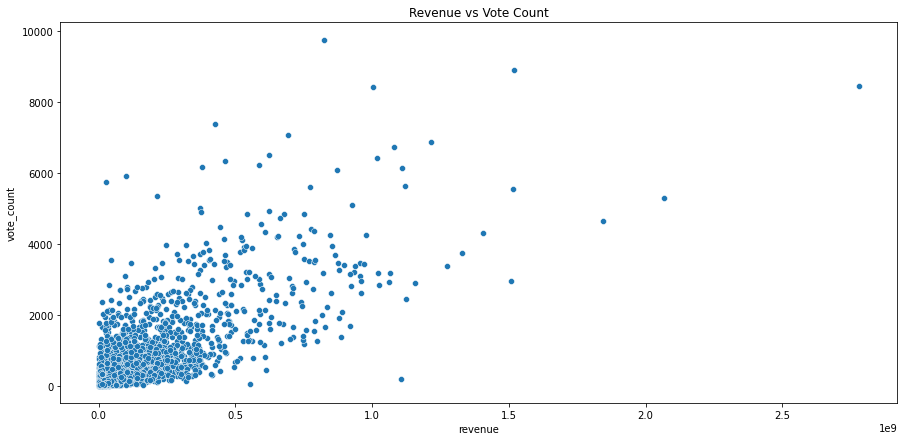

In [16]:
# visualize the budget and revenue in scatter chart
scatter_plot(df_with_budget_and_revenue, 'Revenue vs Vote Count', 'vote_count', 'revenue')

We can say, there is a positive line correlation bewtween reveune and vote count. As well as the direction of values into the vote count side more than revenue side and this means every increase the vote count a little bit increase in revenue.

<a id='question'></a>
## Research Questions


### Research Question 1 (What dose the average movie time consume ?)

In [17]:
# display basic statistic for runtime column
# to see the average of movie runtime 
pd.DataFrame(df_with_budget_and_revenue['runtime'].describe())

,runtime
count,3855.000000
mean,109.215824
std,19.922166
min,15.000000
25%,95.000000
50%,106.000000
75%,119.000000
max,338.000000


the average movie time around 2 hours to 11 

### Research Question 2 (What dose the top five genres ?)

In [18]:
def top_category(df, col):
    """ 
    Extracting all categoroies in the column 
    then return list of all categories of top five with thier rate as dataframe
    
    """
    
    if col is 'genres':
        lsts = [ lst for lst in df[col].apply(lambda x: x.split('|'))]
    else:
        mask = df[col].isna()
        lsts = df[~mask][col].apply(lambda x: x.split('|') if type(x) is not float else x)
        
    lst = [item for lst in lsts for item in lst]
    
    if col is 'genres':
        top_five = round(pd.Series(lst).value_counts(normalize=True) * 100)[:5]        
    elif col is 'tagline':
        return lst
    else:
        top_five = round(pd.Series(lst).value_counts())[:5]
        
    return pd.DataFrame(top_five, columns=['Rate'])

<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\aalsulami\AppData\Local\Temp\ipykernel_11536\2623386784.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if col is 'genres':
C:\Users\aalsulami\AppData\Local\Temp\ipykernel_11536\2623386784.py:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if col is 'genres':
C:\Users\aalsulami\AppData\Local\Temp\ipykernel_11536\2623386784.py:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif col is 'tagline':


In [19]:
# call the top_five_category_column function and add the data and genres column
top_category(df_with_budget_and_revenue, 'genres')

,Rate
Drama,17.0
Comedy,13.0
Thriller,12.0
Action,11.0
Adventure,7.0


The top five movie genres were Drama, Comedy , Thriller , Action and Adventure

In [20]:
# call the top_five_category_column function and add the data and production_companies column
top_category(df_with_budget_and_revenue, 'production_companies')

,Rate
Universal Pictures,329
Warner Bros.,324
Paramount Pictures,270
Twentieth Century Fox Film Corporation,201
Columbia Pictures,178


The above list is the top five production companies.

### Research Question 3 (What are the common phrase in Taglines ?)

In [21]:
# display the count of tags in all movies
df_with_budget_and_revenue['tagline'].unique().shape

(3561,)

In [22]:
# extract all tags then save it in a list
tags_lst = top_category(df_with_budget_and_revenue, 'tagline')

In [23]:
def common_tag(lst):
    """ Finding the count of common tags then return the frequent of each tag as dataframe"""
    
    love_count, story_count, history_count, adventure_count,action_count, thriller_count, comedy_count = 0,0,0,0,0,0,0
    
    for w in lst:
        if 'love' in w.lower():
            love_count+=1
        elif ('story' in w.lower()) & ('h' not in w.lower()):
            story_count +=1
        elif ('history' in w.lower()):
            history_count+=1
        elif ('adventure' in w.lower()):
            adventure_count+=1
        elif ('action' in w.lower()):
            action_count+=1
        elif ('thriller' in w.lower()):
            thriller_count+=1
        elif ('comedy' in w.lower()):
            comedy_count+=1      

    common_tags = {
    'love':love_count,
    'story':story_count,
    'history':history_count,
    'adventure':adventure_count,
    'action':action_count,
    'thriller':thriller_count,
    'comedy':comedy_count
    }
    
    return pd.DataFrame(pd.Series(common_tags).sort_values(ascending=False), columns=['Frequent'])

In [24]:
# display the common tags based on the name of genres
common_tag(tags_lst)

,Frequent
love,197
adventure,77
comedy,41
history,23
story,22
action,15
thriller,2


Note: We can use NLTK to visualize the common tags in the **Tagline**.

<a id='conclusions'></a>
## Conclusions

We can summarize the entier dataset of TMDb Movie in the following points:
- The average movie time around 2 hours to 11.


- The top five movie genres were 
  1. Drama
  2. Comedy
  3. Thriller
  4. Action
  5. Adventure.
  
  
- The top five production companies were
  1. Universal Pictures
  2. Warner Bros
  3. Paramount Pictures
  4. Twentieth Century Fox Film Corporation
  5. Columbia Pictures
  
  
- There is increased as incremently in the count of movie within the last years. There is a drop between 1996 and 1997 and also in the 2015 the count drop.


- There are a positive line correlation between popularity, budget, revenue and vote count. All of the variables except vote count have increased as a little bit when the vote count increase.

#### Limitation

- There are no any variables have stronge correlation except revenue_adj and budget_adj and they are a corrected value from the orignal variables revenue and budget.
- We can add more data specifically movies of recent years to see the latest reflect of new movies and can compare them with last movies.